In [2]:
from konlpy.tag import Hannanum
import pandas as pd
hannanum = Hannanum()

df=pd.read_csv('c:/data/text/군집분석데이터.csv',engine="python",encoding="ms949")
df.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
docs=[]
for i in df['기사내용']:
    docs.append(hannanum.nouns(i))
for i in range(len(docs)):
    docs[i]=' '.join(docs[i])

vec = CountVectorizer()
X = vec.fit_transform(docs)
df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df2.head())

   10대  10배  10분  12억500  12억500만달러  12억5500  12억5500만달러  12억5천500  15명  16  \
0    0    0    0       0          1        0           1         0    0   0   
1    0    0    0       1          0        0           1         0    0   0   
2    0    0    0       1          0        1           0         0    0   0   
3    0    0    0       1          0        0           0         1    0   0   
4    0    0    0       0          0        0           1         0    0   0   

   ...  협조  호소력  홈페이지  확대  확인  확충  환경부  활동  후보물질  흡연  
0  ...   0    0     0   0   0   0    0   0     0   0  
1  ...   0    0     0   0   0   0    0   0     0   0  
2  ...   0    0     0   0   0   0    0   0     0   0  
3  ...   0    0     0   0   0   0    0   0     0   0  
4  ...   0    0     0   0   0   0    0   0     1   0  

[5 rows x 581 columns]


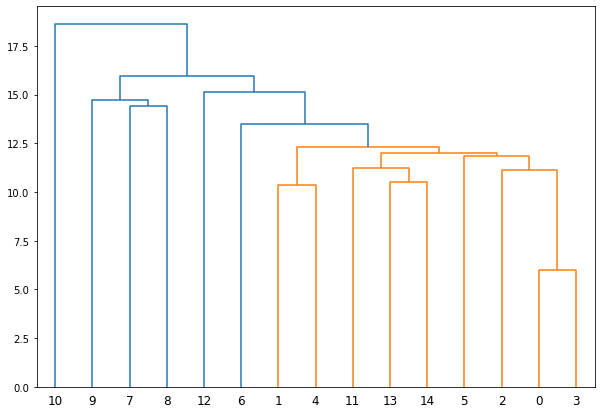

In [4]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

cluster=AgglomerativeClustering(n_clusters=3)
cluster.fit_predict(df2)
plt.figure(figsize=(10,7))
result=shc.linkage(df2)
shc.dendrogram(result)
plt.show()